In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1 what were the average duration and rating of all movies?
#2 ...... of movies in top 3 genres vs movies in remaining genres?
#3 ...... of movies within each of the top 3 genres?

#4 How distributed is the duration?
#5 ..... between top 3 genres and remaining?
#6 ...... among the top 3 genres?

In [3]:
movies=pd.read_csv("Movies.csv")

In [4]:
movies.describe()

,Year,Duration,Rating,Popularity
count,5275.000000,5275.000000,5275.000000,5275.000000
mean,2010.899526,95.235261,5.379981,50.009486
std,4.842039,12.771222,1.248103,28.870229
min,2001.000000,46.000000,1.100000,0.050000
25%,2007.000000,87.000000,4.600000,25.030000
50%,2012.000000,93.000000,5.500000,50.020000
75%,2015.000000,101.000000,6.300000,75.005000
max,2018.000000,219.000000,9.700000,100.000000


In [5]:
#1 what were the average duration and rating of all movies?
movies.Duration.mean()

95.2352606635071

In [6]:
movies.Rating.mean()

5.379981042654029

In [7]:
#2 ...... of movies in top 3 genres vs movies in remaining genres?

In [8]:
movies.Genre.value_counts()[0:3]

Comedy    1670
Drama     1187
Action     751
Name: Genre, dtype: int64

In [44]:
movies.Duration.max()

219

In [9]:
movies.Genre.value_counts()

Comedy       1670
Drama        1187
Action        751
Horror        689
Crime         342
Biography     144
Animation     139
Adventure     139
Thriller       69
Fantasy        45
Sci-Fi         24
Mystery        22
Romance        21
Family         17
Music           6
Musical         5
Western         3
History         1
Sport           1
Name: Genre, dtype: int64

In [10]:
top3genres=list(movies.Genre.value_counts()[0:3].index)

In [54]:
movies[3260:3270]

,Title,Year,Genre,Duration,Director,Rating,Popularity,TopGenre
3260,Insectula!,2015,Comedy,101,Michael Peterson,4.7,9.41,Y
3261,Night Moves,2013,Drama,112,Kelly Reichardt,6.0,77.69,Y
3262,Starship,2011,Fantasy,172,Matt Lang,8.1,9.02,N
3263,Old Fashioned,2014,Drama,115,Rik Swartzwelder,5.2,45.83,Y
3264,AWOL-72,2015,Action,82,Christian Sesma,3.9,21.14,Y
3265,No Tell Motel,2013,Horror,84,Brett Donowho,3.5,40.59,N
3266,Synchronicity,2015,Drama,101,Jacob Gentry,5.5,73.65,Y
3267,Home Run,2013,Drama,113,David Boyd,5.9,54.40,Y
3268,Revenge for Jolly!,2012,Comedy,81,Chadd Harbold,4.6,36.37,Y
3269,Penthouse North,2013,Drama,90,Joseph Ruben,5.6,64.34,Y


In [62]:
movies.Director.value_counts()

Tyler Perry             15
Timothy Woodward Jr.    10
John Lyde               10
Joe Swanberg            10
James Franco             8
                        ..
John Alan Simon          1
Abram Cox                1
Peter Callahan           1
Dan Baron                1
Grant Duffrin            1
Name: Director, Length: 3772, dtype: int64

In [12]:
movies['TopGenre']=np.where(movies.Genre.isin(top3genres),'Y','N')

In [13]:
movies

,Title,Year,Genre,Duration,Director,Rating,Popularity,TopGenre
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83,Y
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69,Y
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08,Y
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60,Y
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58,Y
...,...,...,...,...,...,...,...,...
5270,Bloodline,2018,Crime,97,Henry Jacobson,6.0,64.69,N
5271,The Princess Switch,2018,Comedy,101,Mike Rohl,6.0,80.21,Y
5272,You Might Be the Killer,2018,Comedy,92,Brett Simmons,5.9,61.14,Y
5273,The Final Wish,2018,Horror,95,Timothy Woodward Jr.,4.2,54.68,N


In [14]:
movies.loc[:,['Duration','Rating','TopGenre']].groupby('TopGenre').mean()

,Duration,Rating
TopGenre,,
N,93.668866,5.158188
Y,95.958980,5.482456


In [15]:
#3 ...... of movies within each of the top 3 genres?

In [16]:
movies.loc[movies.TopGenre=='Y',['Duration','Rating','Genre']].groupby('Genre').mean()

,Duration,Rating
Genre,,
Action,96.390146,4.838083
Comedy,94.711377,5.551317
Drama,97.441449,5.793260


In [17]:
#4 How distributed is the duration?

C:\Users\Sidd-pc\AppData\Local\Temp\ipykernel_4780\2009047848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies.Duration);


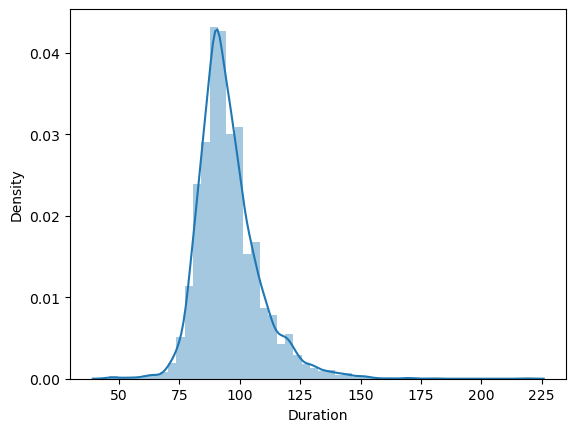

In [18]:
sns.distplot(movies.Duration);

<Axes: xlabel='Duration'>

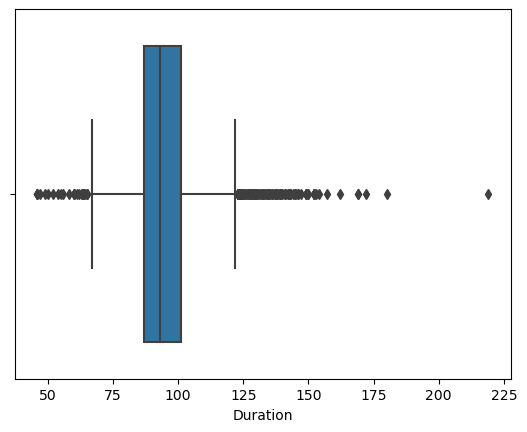

In [19]:
sns.boxplot(x=movies.Duration)

In [20]:
movies.Duration.describe()

count    5275.000000
mean       95.235261
std        12.771222
min        46.000000
25%        87.000000
50%        93.000000
75%       101.000000
max       219.000000
Name: Duration, dtype: float64

In [21]:
#5 ..... between top 3 genres and remaining?

In [22]:
movies.loc[:,['Duration','Rating','TopGenre']].groupby('TopGenre').describe()

Duration                                                        \
            count       mean        std   min   25%   50%    75%    max   
TopGenre                                                                  
N          1667.0  93.668866  13.370454  46.0  85.0  91.0  100.0  219.0   
Y          3608.0  95.958980  12.419990  47.0  88.0  94.0  102.0  180.0   

          Rating                                               
           count      mean       std  min  25%  50%  75%  max  
TopGenre                                                       
N         1667.0  5.158188  1.343893  1.2  4.2  5.2  6.1  9.2  
Y         3608.0  5.482456  1.187550  1.1  4.8  5.6  6.3  9.7

<Axes: xlabel='Duration', ylabel='TopGenre'>

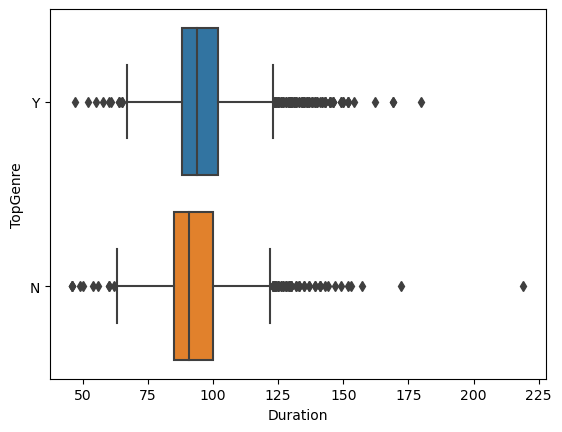

In [23]:
sns.boxplot(x=movies.Duration,y=movies.TopGenre)

In [24]:
topgenremovies=movies.loc[movies.TopGenre=='Y',['Duration','Genre']]
topgenremovies

,Duration,Genre
0,72,Drama
1,104,Drama
2,100,Comedy
3,88,Action
4,142,Action
...,...,...
5263,81,Comedy
5267,92,Drama
5268,74,Action
5271,101,Comedy


<Axes: xlabel='Duration', ylabel='Genre'>

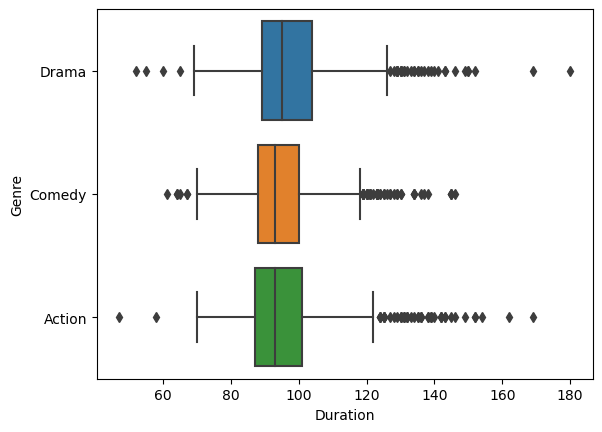

In [25]:
sns.boxplot(x=topgenremovies.Duration,y=topgenremovies.Genre)

In [63]:
import scipy.stats as ss

In [64]:
ss.norm.cdf(x=120, loc=150,scale=21)

0.07656372550983476